<a href="https://colab.research.google.com/github/GerardoMunoz/ML_2025/blob/main/Perceptron_0_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyzing Order Completion Time in a Fast-Food Restaurant**

## **Introduction**
In a fast-food restaurant, a customer records the time it takes to receive their order each time they visit. After visiting **10 times**, they plot the number of hamburgers ordered against the wait time. The goal is to understand the relationship between the number of hamburgers ordered and the time required for order completion.

## **Collected Data**
Below is the recorded data from the customer's visits:

| **Number of Hamburgers Ordered (\( x \))** | **Time to Get Called (\( y \))** (in minutes) |
|------------------|------------------|
| $x_1$=1  | $y_{r1}$=4.8  |
| $x_2$=2  | $y_{r2}$=7.2  |
| $x_3$=3  | $y_{r3}$=9.0  |
| $x_4$=2  | $y_{r4}$=6.7  |
| $x_5$=4  | $y_{r5}$=11.2 |
| $x_6$=5  | $y_{r6}$=13.3 |
| $x_7$=3  | $y_{r7}$=9.5  |
| $x_8$=6  | $y_{r8}$=15.1 |
| $x_9$=5  | $y_{r9}$=12.6 |
| $x_{10}$=7  | $y_{r10}$=17.5 |



In [ ]:
# Defien the datat
X = [  1,   2,   3,   2,    4,    5,   3,    6,    5,  7  ]  # Number of hamburgers
Y_r = [4.8, 7.2, 9.0, 6.7, 11.2, 13.3, 9.5, 15.1, 12.6, 17.5]  # Time in minutes


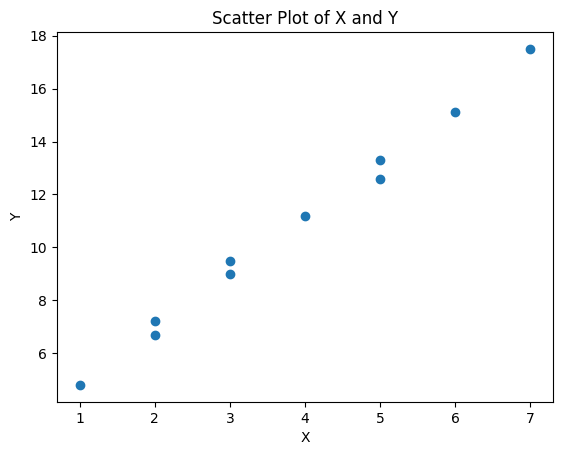

In [ ]:
#Plot the data
import matplotlib.pyplot as plt

plt.scatter(X, Y_r)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot of X and Y")
plt.show()


After attempting to find an exact function that fits all the data points, he realizes that no single function can perfectly match them, especially for values like **2, 3, and 5**, which have multiple corresponding wait times.  

Instead, he decides to create a linear equation, $ y = mx + b $, that closely approximates the data points. To improve the accuracy of this line, he develops a method to **iteratively adjust it**, refining the slope $ m $ and intercept $b$ each time to minimize the overall error.




## **Step 1: Initial Guess for the Prediction Line**  
The first step is to estimate a **prediction line** ($y_p$) in the form of:

$y_p = mx + b$

where:
- $ m $ is the slope (initially guessed as **1**),
- $ b $ is the intercept (initially guessed as **-1**).

## **Step 2: Measuring the Error**  
To evaluate how well our prediction aligns with the real data, we define the **error** as the difference between the **real value** ($ y_r $) and the **predicted value** ($ y_p $):

$e = y_r - y_p$

Since we want a differentiable function for optimization, we use the **Mean Squared Error (MSE)** as our loss function:

$L = \frac{1}{2} (y_r - y_p)^2 = \frac{1}{2} (y_r - (mx + b))^2$

We can show the  imaige of how the MSE changes for the diferent values of m and b, for the  first point $x=1, \ \ y_r=4.8$  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from mpl_toolkits.mplot3d import Axes3D

# Define the loss function
def loss_function(m, b, x, y_r):
    return 0.5 * (y_r - (m * x + b))**2

# Function to plot L vs m, b
def plot_loss_3D(x=1, y_r=4.8):
    m_values = np.linspace(-5, 5, 100)  # Range of m values
    b_values = np.linspace(-5, 5, 100)  # Range of b values

    M, B = np.meshgrid(m_values, b_values)  # Create grid
    L = loss_function(M, B, x, y_r)  # Compute L values

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot surface
    ax.plot_surface(M, B, L, cmap='viridis', edgecolor='none', alpha=0.8)

    # Labels
    ax.set_xlabel("m")
    ax.set_ylabel("b")
    ax.set_zlabel("L")
    ax.set_title(f"Loss Surface (L vs m, b) | x={x}, y_r={y_r}")

    plt.show()

# Create interactive sliders
widgets.interact(
    plot_loss_3D,
    x=widgets.FloatSlider(min=-5, max=5, step=0.1, value=1, description="x"),
    y_r=widgets.FloatSlider(min=-5, max=5, step=0.1, value=4.8, description="y_r")
);


interactive(children=(FloatSlider(value=1.0, description='x', max=5.0, min=-5.0), FloatSlider(value=4.8, descr…

If  b=-1 then we obtain the next cut

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Define the loss function
def loss_function(m, x, y_r, b):
    return 0.5 * (y_r - (m * x + b))**2

# Function to plot L vs m
def plot_loss(x=1, y_r=1, b=0):
    m_values = np.linspace(-5, 10, 200)  # Range of m values
    L_values = loss_function(m_values, x, y_r, b)  # Compute L

    plt.figure(figsize=(6, 4))
    plt.plot(m_values, L_values, label=f"x={x}, y_r={y_r}, b={b}")
    plt.xlabel("m")
    plt.ylabel("L")
    plt.title("Loss Function: L vs m")
    plt.legend()
    plt.grid()
    plt.show()

# Create interactive sliders
widgets.interact(
    plot_loss,
    x=widgets.FloatSlider(min=-5, max=5, step=0.1, value=1, description="x"),
    y_r=widgets.FloatSlider(min=-5, max=10, step=0.1, value=4.8, description="y_r"),
    b=widgets.FloatSlider(min=-5, max=5, step=0.1, value=-1, description="b")
);


interactive(children=(FloatSlider(value=1.0, description='x', max=5.0, min=-5.0), FloatSlider(value=4.8, descr…

The minimum value of $L$ depends on the selected point $P_i=(x_i,y_{ri})$, so we only need to take small steps at each point. To do this, we need to know the slope to find the direction in which $L$ decreases, and define the step size, called the **learning rate** ($\eta$).



## **Step 3: Minimizing the Error by Adjusting $ m $ and $ b $**  
Our goal is to adjust $ m $ and $ b $ to **minimize** the error. To do this, we compute the gradients (derivatives) of the loss function with respect to $ m $ and $ b $.

### **Updating $ m $ (Slope)**
The partial derivative of $ L $ with respect to $ m $ is:

$\frac{dL}{dm} = - (y_r - y_p) x = - e x$

### **Updating $ b $ (Intercept)**
The partial derivative of $ L $ with respect to $ b $ is:

$\frac{dL}{db} = - (y_r - y_p) = -e $


### **Gradient Descent Update Rule**  
We update $ m $ and $ b $ iteratively using **Gradient Descent**. A small constant, called the **learning rate** ($ \eta $), controls the step size:

$m = m - \eta \frac{dL}{dm} = m + \eta e x$

$b = b - \eta \frac{dL}{db} = b + \eta e$

By repeatedly applying these updates, we gradually improve the prediction line, making it **better fit** the data.

If we iteraate over all the points we obtain

$m = m - \eta \frac{dL}{dm} = m + \eta (e_1 x_1 + e_2 x_2 + \cdots + e_n x_n)$

$b = b - \eta \frac{dL}{db} = b + \eta (e_1 + e_2 + \cdots
 + e_n)$

## **Step 4: Expressing in Vector Form**  
Now, we can write our equations using vector notation for better efficiency in computations. We are going to use affine vectors and matrices.

$\mathbf{x} = \begin{bmatrix} x & 1 \end{bmatrix}$

$\mathbf{y_r} = \begin{bmatrix} y_r & 1 \end{bmatrix}$

$\mathbf{y_p} = \begin{bmatrix} y_p & 1 \end{bmatrix}$

$\mathbf{W} = \begin{bmatrix} m & 0 \\ b & 1 \end{bmatrix}$

So, the line equation is:

$\mathbf{y_p} = \mathbf{x} \mathbf{W}$

$\begin{bmatrix} y_p & 1 \end{bmatrix} =
\begin{bmatrix} x & 1 \end{bmatrix}
\begin{bmatrix} m & 0 \\ b & 1 \end{bmatrix}$

$\begin{bmatrix} y_p & 1 \end{bmatrix} =
\begin{bmatrix} mx + b & 1 \end{bmatrix} $

$y_p=mx+b$,  $\ \ \ \ 1=1$



The points an the error matrices are:

$\mathbf{X}= \begin{bmatrix} x_1 & 1 \\ x_2 & 1 \\ \vdots & \vdots \\ x_n & 1 \end{bmatrix}$

$\mathbf{Y_r}= \begin{bmatrix} y_{r1} & 1 \\ y_{r2} & 1 \\ \vdots & \vdots \\ y_{rn} & 1 \end{bmatrix}$


$\mathbf{Y_p} = \mathbf{X} \mathbf{W}$


$\mathbf{E}= \mathbf{Y_r}-\mathbf{Y_p}=
\begin{bmatrix} y_{r1} - y_{p1} & 1-1 \\ y_{r2}  - y_{p1} & 1-1  \\ \vdots & \vdots \\ y_{rn}  - y_{p1} & 1-1  \end{bmatrix}=\begin{bmatrix} e_1 & 0 \\ e_2 & 0 \\ \vdots & \vdots \\ e_n & 0 \end{bmatrix}$

Now we are going to see how to update $\mathbf{W}$

$\mathbf{W} += \eta \mathbf{X}^T \mathbf{E}$



$\begin{bmatrix} m & 0 \\ b & 1 \end{bmatrix} += \eta
\begin{bmatrix} x_1 &  x_2  & \cdots & x_n \\  1 & 1 &\cdots & 1 \end{bmatrix}\begin{bmatrix} e_1 & 0 \\ e_2 & 0 \\ \vdots & \vdots \\ e_n & 0 \end{bmatrix}$

$\begin{bmatrix} m & 0 \\ b & 1 \end{bmatrix} +=\eta \begin{bmatrix} e_1 x_1 + e_2 x_2 + \cdots + e_n x_n & 0 \\ e_1 + e_2 + \cdots
 + e_n & 0 \end{bmatrix} $

 That corresponds with the result of the end of step 3


In [ ]:
# View the datat
X

[1, 2, 3, 2, 4, 5, 3, 6, 5, 7]

In [ ]:
Y_r

[4.8, 7.2, 9.0, 6.7, 11.2, 13.3, 9.5, 15.1, 12.6, 17.5]

In [ ]:
# Initialize parameters
m = 1  # Initial slope
b = -1  # Initial intercept
learning_rate = 0.01
iterations = 20
Y_p = [   m * x + b     for x in X   ]

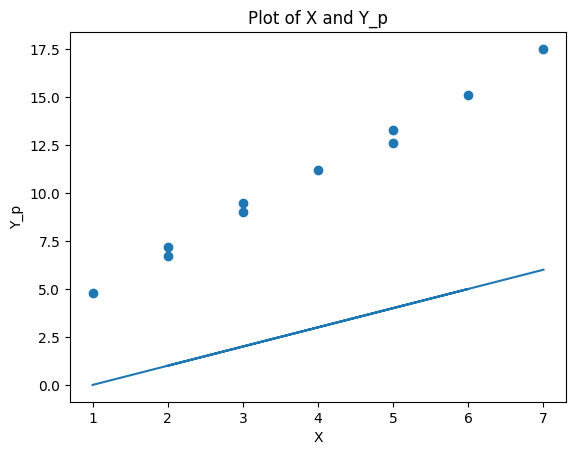

In [ ]:
import numpy as np

# Define the matrices
X = np.array([[1, 1], [2, 1], [3, 1], [2, 1], [4, 1], [5, 1], [3, 1], [6, 1], [5, 1], [7, 1]])
Y_r = np.array([[4.8, 1], [7.2, 1], [9.0, 1], [6.7, 1], [11.2, 1], [13.3, 1], [9.5, 1], [15.1, 1], [12.6, 1], [17.5, 1]])
W = np.array([[m, 0], [b, 1]])
Y_p = X @ W

# Plot only X and Y_p
plt.plot(X[:,0], Y_p[:,0])  # Use plot for a line graph
plt.scatter(X[:,0], Y_r[:,0])
plt.xlabel("X")
plt.ylabel("Y_p")
plt.title("Plot of X and Y_p")
plt.show()




Error: 11.5, m: 4.355, b: -0.21099999999999997


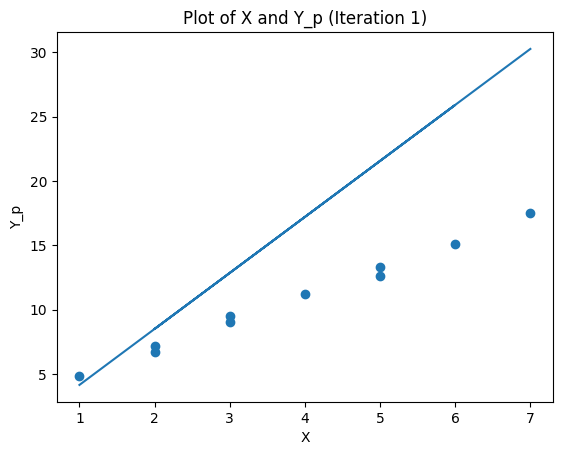

Error: 0.6559999999999997, m: 1.438279999999999, b: -0.7758000000000003


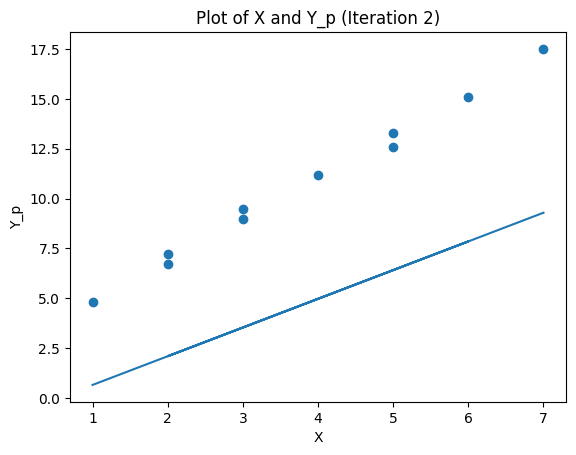

Error: 8.207840000000008, m: 3.927945600000001, b: -0.17576639999999977


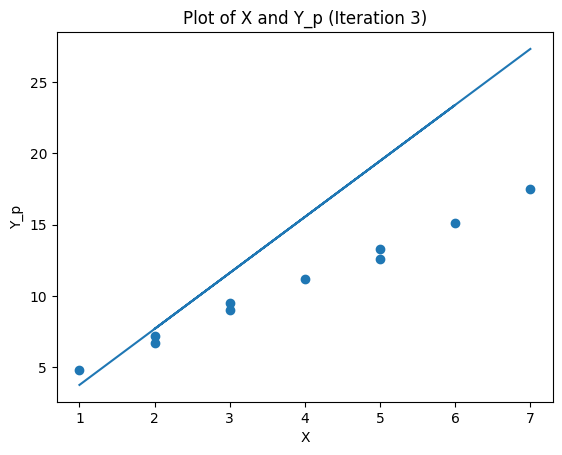

Error: 1.0478207999999984, m: 1.7579936639999993, b: -0.5818090880000002


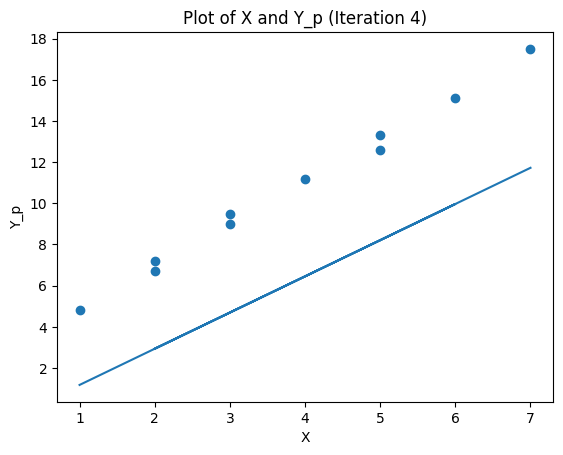

Error: 5.775853440000004, m: 3.60485239552, b: -0.12266577151999997


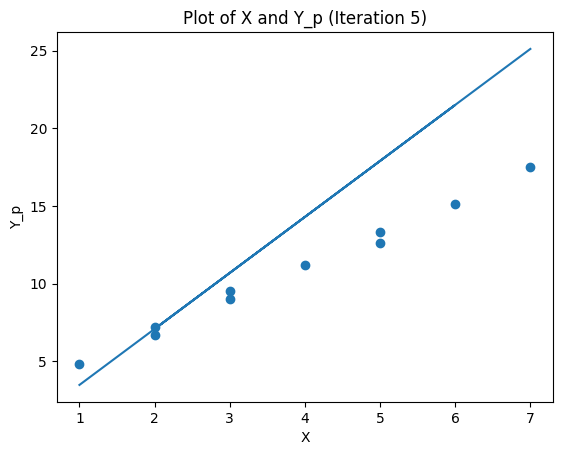

Error: 1.3178133759999997, m: 1.989828124672, b: -0.41124310466559993


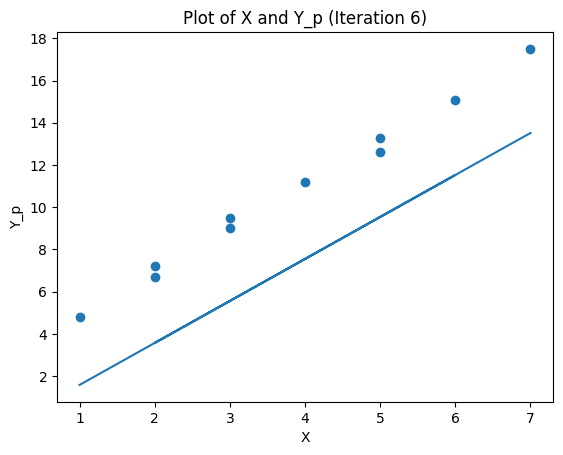

Error: 3.9824462319615996, m: 3.3592064425287678, b: -0.05725348157439991


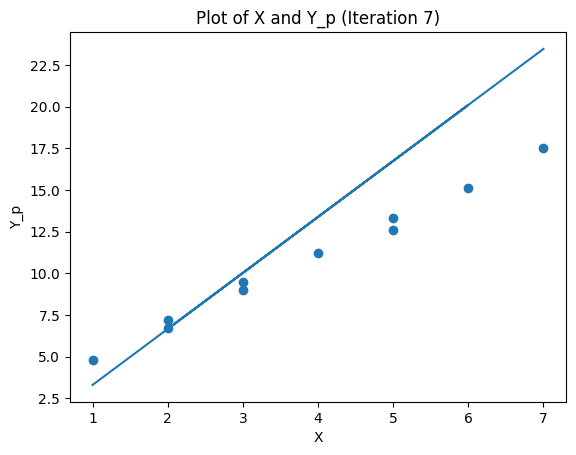

Error: 1.4980470390456322, m: 2.1565752978258326, b: -0.2590265815778917


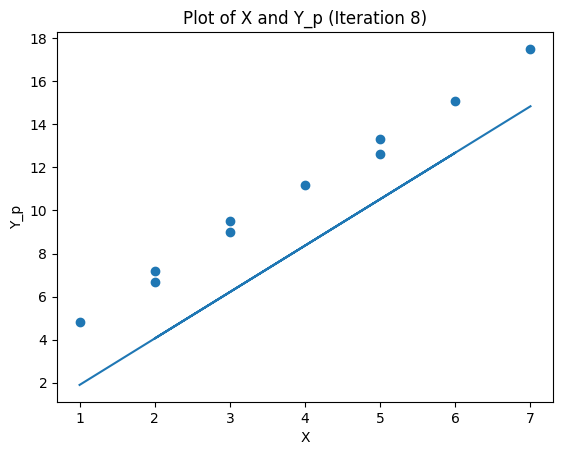

Error: 3.2893006881003943, m: 3.17130136869545, b: 0.01637746340608115


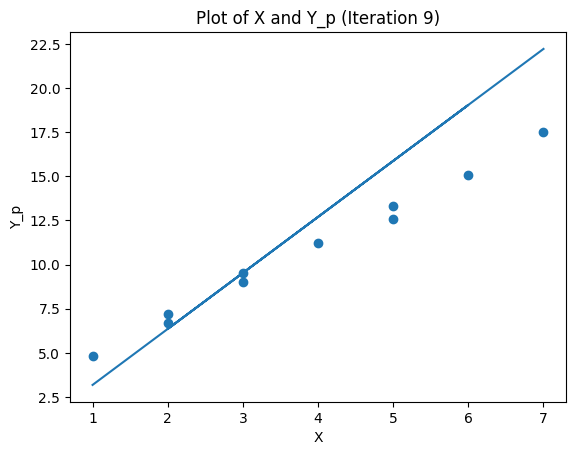

Error: 1.612321167898469, m: 2.2751614963232383, b: -0.12135480303879795


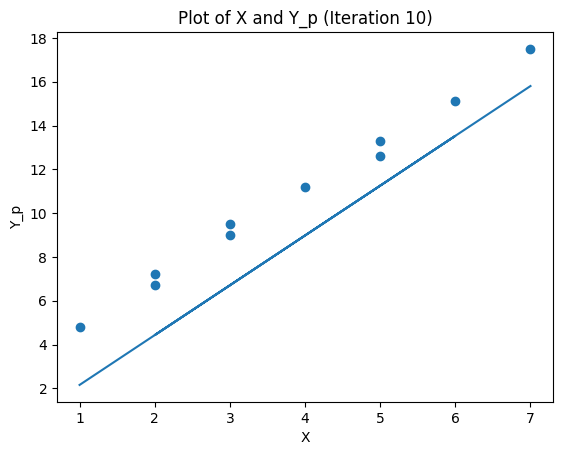

Error: 2.7958703140690835, m: 3.0264888580226175, b: 0.09521930866225134


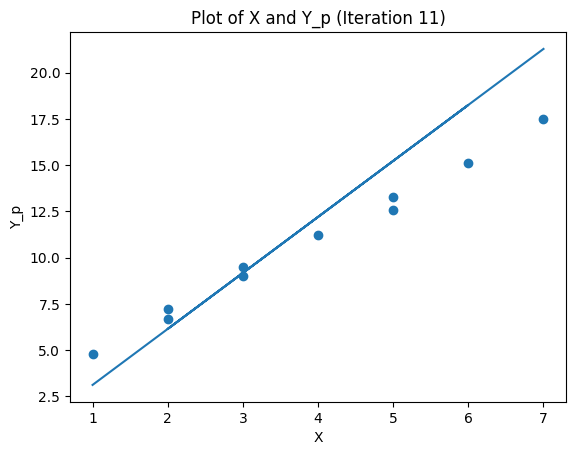

Error: 1.6782918333151309, m: 2.3581553534507025, b: 0.004631611747431527


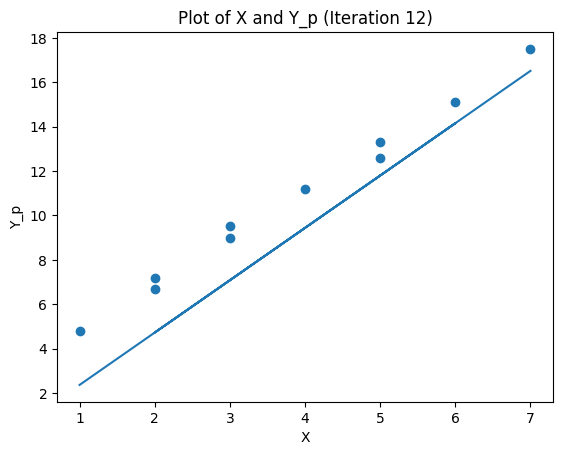

Error: 2.479057681351164, m: 2.913878811844428, b: 0.17706941626142148


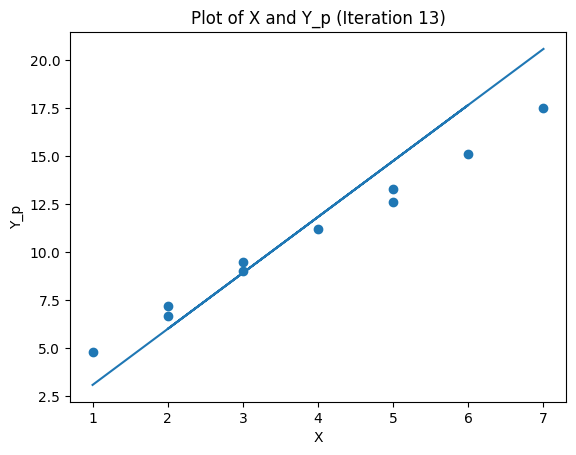

Error: 1.70905177189415, m: 2.4148881485820057, b: 0.12108852613439666


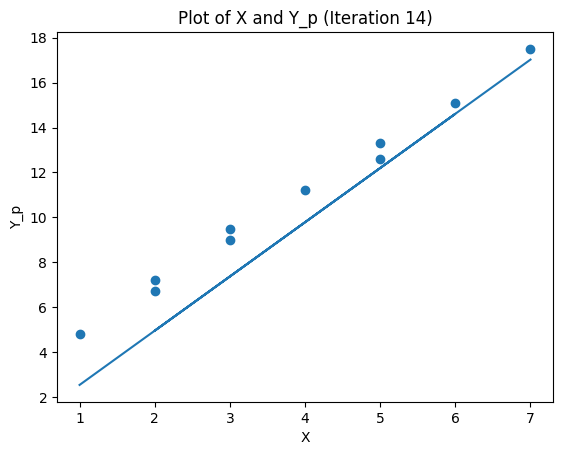

Error: 2.2640233252835973, m: 2.8253736041749646, b: 0.26032217705979477


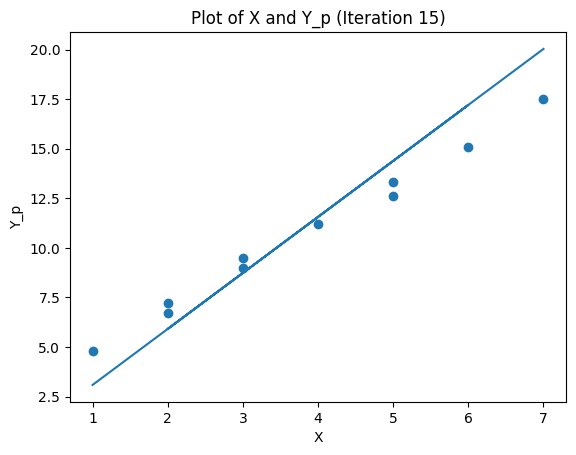

Error: 1.7143042187652404, m: 2.4522861614608056, b: 0.22964798976732873


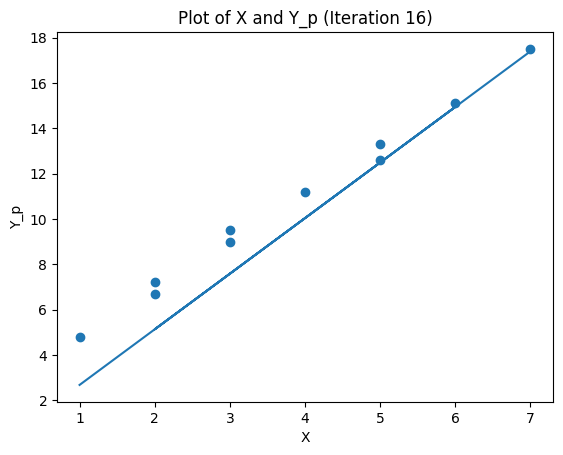

Error: 2.1180658487718653, m: 2.7549505579489866, b: 0.3438144494354897


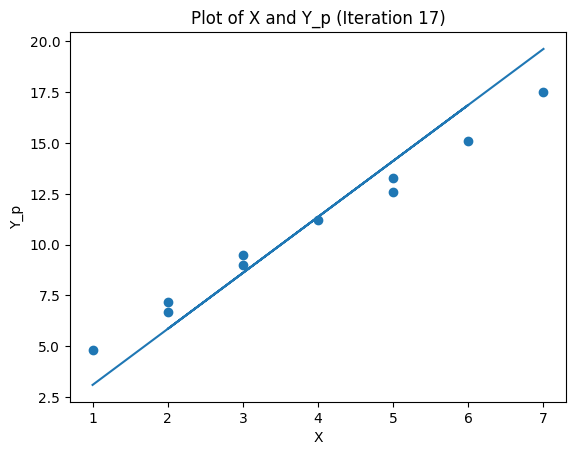

Error: 1.7012349926155235, m: 2.4754890740143045, b: 0.33155179247132593


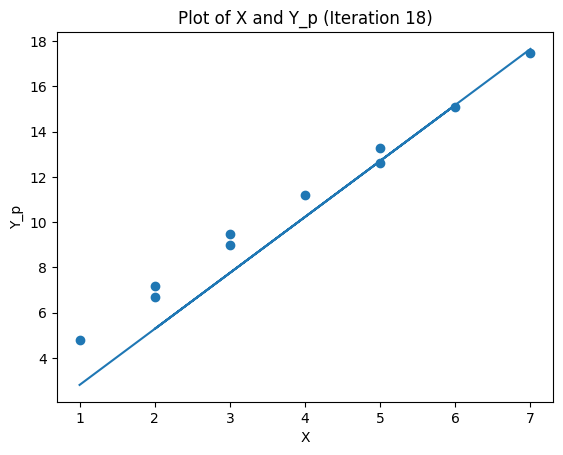

Error: 1.9929591335143693, m: 2.698128841129739, b: 0.42671076509875766


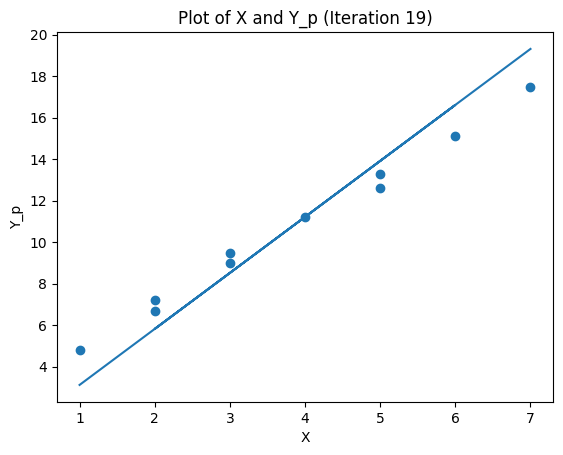

Error: 1.6751603937715034, m: 2.4883094131812755, b: 0.4277507289595811


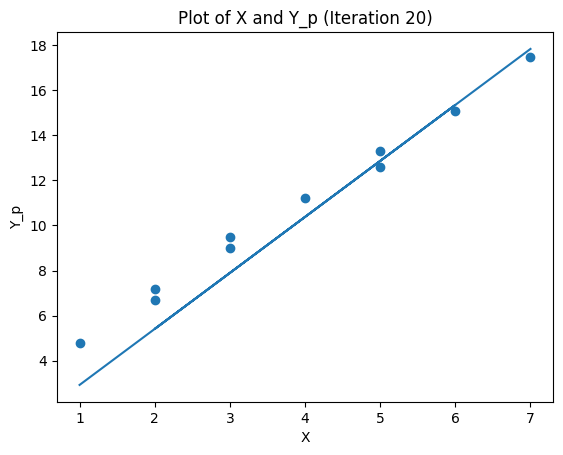

In [ ]:
for i in range(iterations):
    # Update values
    E = Y_r - Y_p
    W = W + learning_rate * X.T @ E
    print(f'Error: {max(E[:,0])}, m: {W[0,0]}, b: {W[1,0]}')
    Y_p = X @ W

    # Plot only X and Y_p
    plt.plot(X[:,0], Y_p[:,0])  # Use plot for a line graph
    plt.scatter(X[:,0], Y_r[:,0])
    plt.xlabel("X")
    plt.ylabel("Y_p")
    plt.title(f"Plot of X and Y_p (Iteration {i+1})")
    plt.show()


In [ ]:
for i in range(3000):
    # Update values
    E = Y_r - Y_p
    W = W + learning_rate * X.T @ E
    if i%100 == 0:
        print(f'Error: {max(E[:,0])}, m: {W[0,0]}, b: {W[1,0]}')
    Y_p = X @ W

Error: 1.883939857859143, m: 2.6515733807139643, b: 0.5084180790547383
Error: 0.5970473847203621, m: 2.144412243434416, b: 2.4721977684703123
Error: 0.48178307824941946, m: 2.0752592502485108, b: 2.79284085184693
Error: 0.4631266494241011, m: 2.0640662921888864, b: 2.8447394892521913
Error: 0.46010695785213684, m: 2.062254622794144, b: 2.8531396970002367
Error: 0.45961819672452897, m: 2.0619613896757527, b: 2.8544993375175642
Error: 0.4595390868438791, m: 2.06191392756044, b: 2.8547194061625087
Error: 0.4595262822797199, m: 2.061906245439122, b: 2.854755026025163
Error: 0.45952420975904573, m: 2.061905002026612, b: 2.854760791383585
Error: 0.4595238743050736, m: 2.0619048007703964, b: 2.854761724552758
Error: 0.45952382000917247, m: 2.061904768195474, b: 2.8547618755936193
Error: 0.459523811220949, m: 2.0619047629229637, b: 2.854761900040786
Error: 0.4595238097985046, m: 2.061904762069566, b: 2.8547619039977543
Error: 0.45952380956827277, m: 2.0619047619314372, b: 2.854761904638222
Err

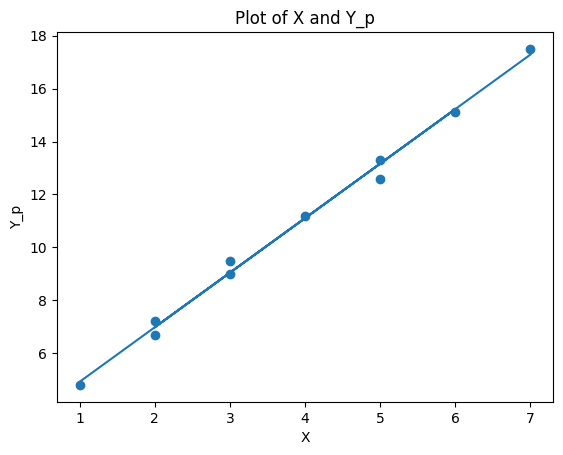

In [ ]:
# Plot only X and Y_p
plt.plot(X[:,0], Y_p[:,0])  # Use plot for a line graph
plt.scatter(X[:,0], Y_r[:,0])
plt.xlabel("X")
plt.ylabel("Y_p")
plt.title("Plot of X and Y_p")
plt.show()

In [ ]:
W

array([[2.06190476, 0.        ],
       [2.8547619 , 1.        ]])




### **Conclusion**

The time required to receive a hamburger order can be approximated by 3 minutes plus two times the number of hamburgers ordeed.

By following this iterative correction process, we gradually refine the prediction line $ y = mx + b $, ensuring it **closely fits** the observed data points. This is the foundation of **Linear Regression with Gradient Descent**, a fundamental technique in machine learning.

### Next Steps
Your list of next topics is great because it follows a logical progression from simple to more advanced concepts. Here’s a slightly refined version with brief explanations to guide the reader:

1. Two or More Inputs (Multiple Linear Regression): What happens when order time depends on multiple factors? (e.g., number of hamburgers + fries + drinks)

2. Two or More Outputs (Multivariate Regression): Predicting multiple things at once (e.g., waiting time and preparation cost).

3. Lasso and Ridge Regression (Regularization Techniques): Avoiding overfitting by adding constraints to the model.

4. Gradient Descent vs. Analytical Solutions: When should we use iterative (Gradient Descent) vs. direct (Normal Equations) solutions?

5. Polynomial Regression (Non-Linearity): What if waiting time doesn’t grow linearly?

6. Neural Networks (From Perceptron to Deep Learning): Extending linear regression concepts into deep learning.
